### Base Analysis and Cleaning

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [126]:
df = pd.read_csv('dataSets/cinemaTicket_ref.csv')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [128]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

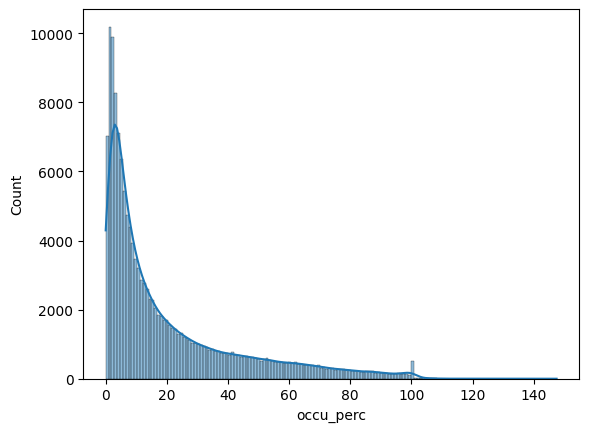

In [129]:
plt.figure()
sns.histplot(df['occu_perc'], kde=True)
plt.show()

In [130]:
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\ainsi\AppData\Local\Temp\ipykernel_22804\2434863376.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ainsi\AppData\Local\Temp\ipykernel_22804\2434863376.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [131]:
df['occu_perc'] = np.log1p(df['occu_perc'])

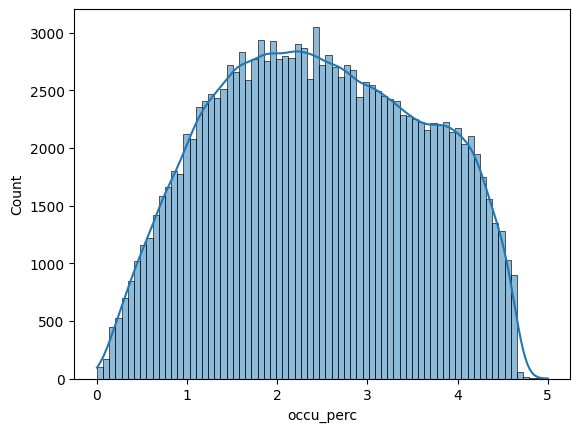

In [132]:
plt.figure()
sns.histplot(df['occu_perc'], kde=True)
plt.show()

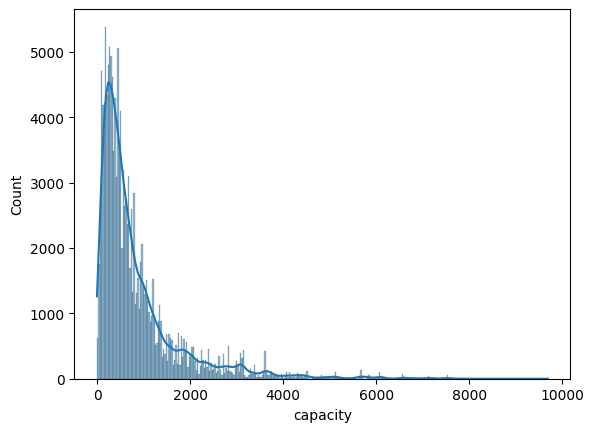

In [133]:
plt.figure()
sns.histplot(df['capacity'], kde=True)
plt.show()

In [134]:
df['capacity'] = np.log1p(df['capacity'])

e:\projects\machine-learning\Notebooks\venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


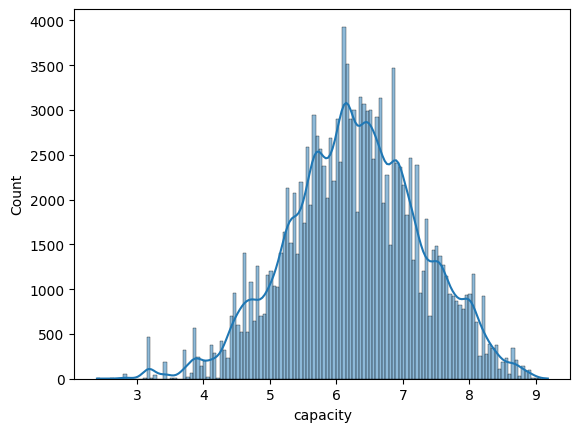

In [135]:
plt.figure()
sns.histplot(df['capacity'], kde=True)
plt.show()

In [136]:
df['occu_perc'].fillna(df['occu_perc'].median(), inplace=True)
df['capacity'].fillna(df['capacity'].median(), inplace=True)

C:\Users\ainsi\AppData\Local\Temp\ipykernel_22804\912128807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occu_perc'].fillna(df['occu_perc'].median(), inplace=True)
C:\Users\ainsi\AppData\Local\Temp\ipykernel_22804\912128807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [137]:
df[df.duplicated()]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
56269,1484,448,324719994,2170,0,13,4.436633,149640.550230,2170,7.863310,2018-03-24,3,1,24
56270,1484,637,304000000,1700,0,1,2.429218,178823.529412,1700,6.266658,2018-03-24,3,1,24
56271,1484,344,136500000,914,3,6,4.063885,149343.544858,911,7.377072,2018-03-24,3,1,24
56272,1484,304,98100000,661,0,5,4.479607,148411.497731,661,6.632038,2018-03-24,3,1,24
56273,1484,163,97080000,813,0,8,4.402442,119409.594096,813,6.916774,2018-03-24,3,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56370,1484,315,2500000,50,0,2,2.871868,50000.000000,50,5.706911,2018-03-24,3,1,24
56371,1484,487,1600000,16,0,5,0.837248,100000.000000,16,7.108550,2018-03-24,3,1,24
56372,1484,472,1575000,25,0,1,2.270062,63000.000000,25,5.666490,2018-03-24,3,1,24
56373,1484,299,1100000,28,0,2,1.386294,39285.714286,28,6.839833,2018-03-24,3,1,24


In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df[df.duplicated()]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day


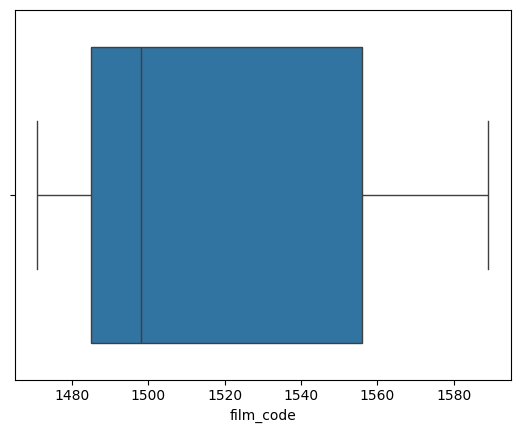

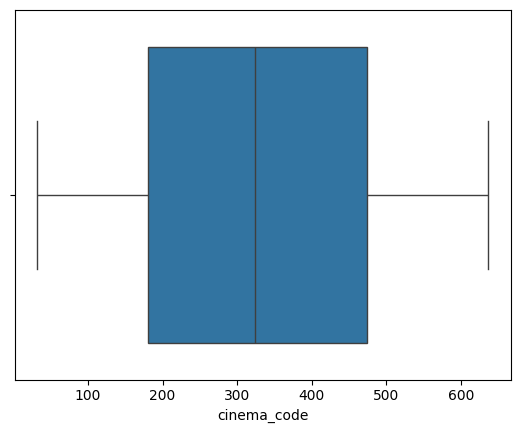

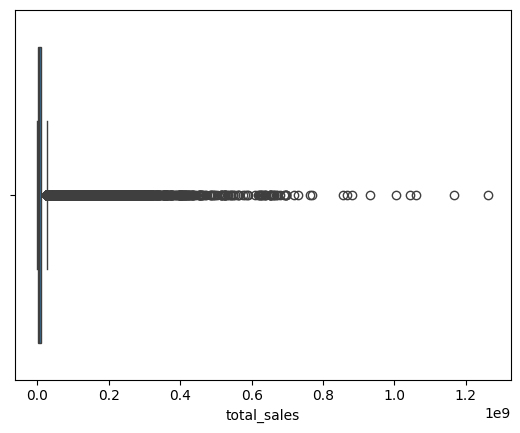

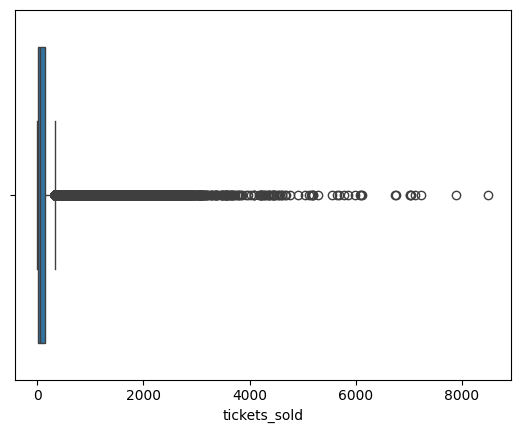

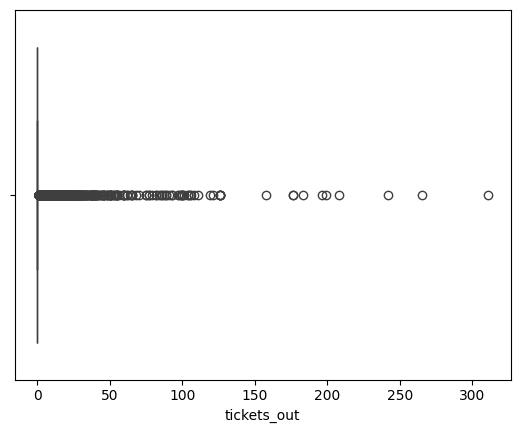

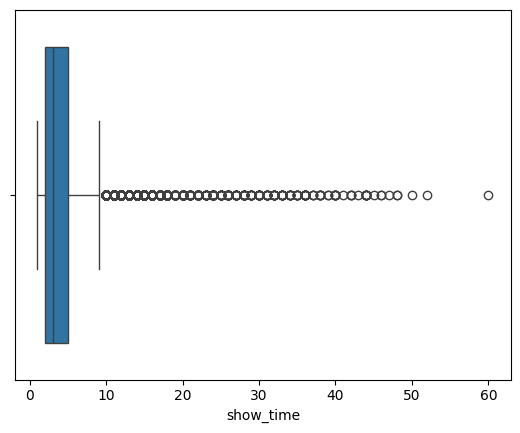

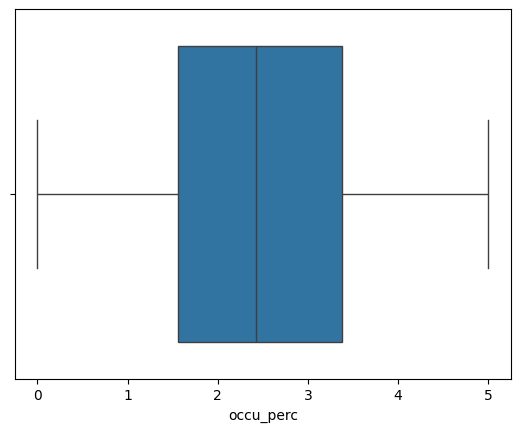

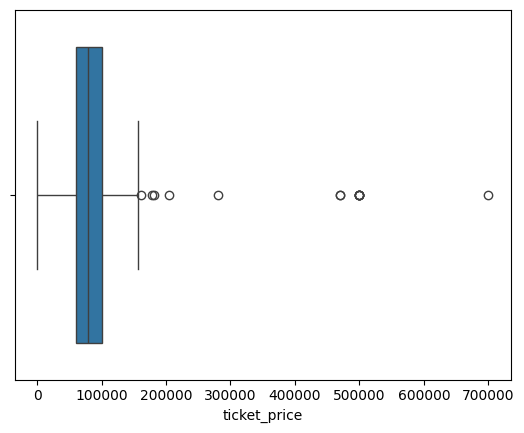

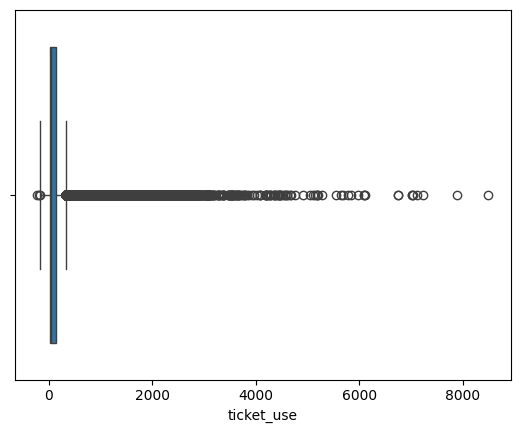

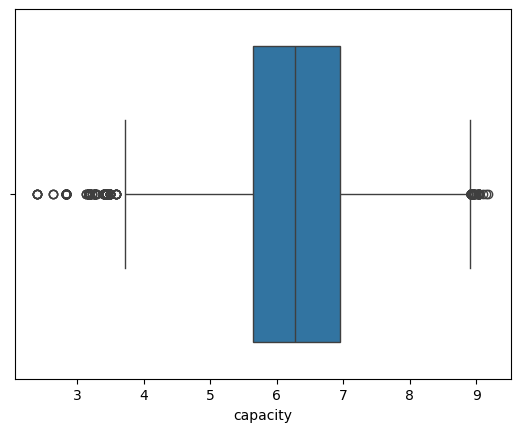

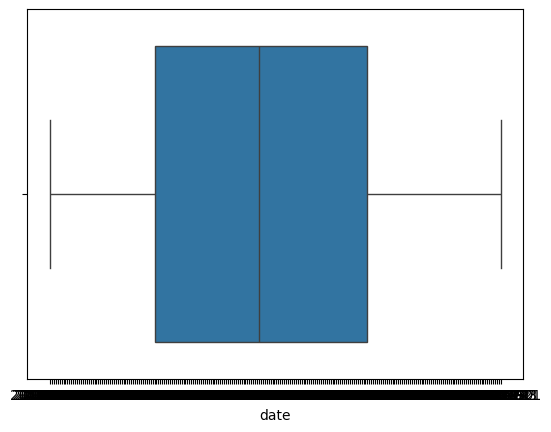

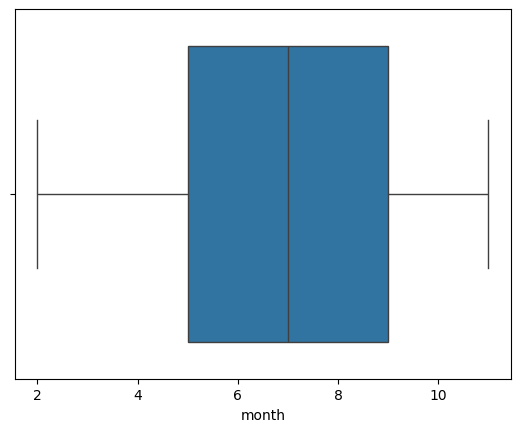

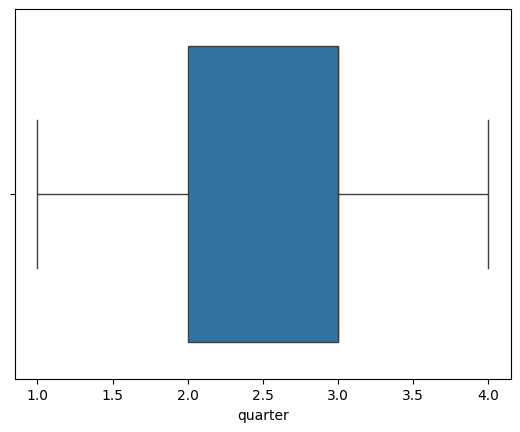

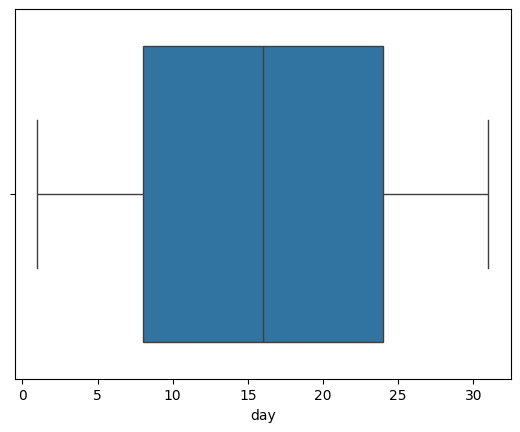

In [140]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

In [141]:
# Date seems useless since its already been feature engineered.
df.drop(columns=['date'], inplace=True)

In [142]:
# The codes are also not needed
df.drop(columns=['film_code'], inplace=True)
df.drop(columns=['cinema_code'], inplace=True)

In [143]:
df.skew()

total_sales      9.953612
tickets_sold     6.798162
tickets_out     44.074078
show_time        2.811347
occu_perc        0.020420
ticket_price     0.735650
ticket_use       6.802417
capacity        -0.111706
month            0.047874
quarter          0.125107
day             -0.060368
dtype: float64

In [144]:
highSkewCols = ['total_sales', 'tickets_sold', 'tickets_out']

for col in highSkewCols:
    df[col] = np.log1p(df[col])

# For some reason ticket_use has negative values so we have to deal with that seperately
shift = abs(df['ticket_use'].min()) + 1
df['ticket_use'] = np.log1p(df['ticket_use'] + shift)

In [145]:
df.skew()

total_sales     0.083494
tickets_sold    0.143399
tickets_out     6.593227
show_time       2.811347
occu_perc       0.020420
ticket_price    0.735650
ticket_use      2.064165
capacity       -0.111706
month           0.047874
quarter         0.125107
day            -0.060368
dtype: float64

### Encoding

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142418 entries, 0 to 142523
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   total_sales   142418 non-null  float64
 1   tickets_sold  142418 non-null  float64
 2   tickets_out   142418 non-null  float64
 3   show_time     142418 non-null  int64  
 4   occu_perc     142418 non-null  float64
 5   ticket_price  142418 non-null  float64
 6   ticket_use    142418 non-null  float64
 7   capacity      142418 non-null  float64
 8   month         142418 non-null  int64  
 9   quarter       142418 non-null  int64  
 10  day           142418 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 13.0 MB


In [147]:
df.describe()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000,142418.000000
mean,15.150432,3.980161,0.062032,3.931610,2.459286,81229.345104,5.764282,6.275190,6.779663,2.635938,16.106714
std,1.544028,1.394786,0.330780,3.056189,1.126715,33237.810182,0.422881,0.999528,2.194240,0.808764,8.950213
min,9.903538,0.693147,0.000000,1.000000,0.000000,483.870968,0.693147,2.397895,2.000000,1.000000,1.000000
25%,14.046623,2.944439,0.000000,2.000000,1.558145,60000.000000,5.476464,5.637359,5.000000,2.000000,8.000000
50%,15.126543,3.931826,0.000000,3.000000,2.429218,79440.559441,5.602119,6.266658,7.000000,3.000000,16.000000
75%,16.222456,4.969813,0.000000,5.000000,3.373484,100000.000000,5.897154,6.945791,9.000000,3.000000,24.000000
max,20.956613,9.047821,5.743003,60.000000,5.000585,700000.000000,9.073375,9.179169,11.000000,4.000000,31.000000


In [148]:
df.head()

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,15.176487,3.295837,0.0,4,1.660131,150000.0,5.509388,6.415635,5,2,5
1,15.027452,3.761200,0.0,5,2.206074,80000.0,5.572154,6.255370,5,2,5
2,14.755518,3.496508,0.0,4,3.044522,80000.0,5.533389,5.081404,5,2,5
3,13.997833,2.564949,0.0,1,2.485740,100000.0,5.451038,4.700406,5,2,5
4,13.997833,2.772589,0.0,3,2.871868,80000.0,5.463832,4.510662,5,2,5


In [149]:
# Based on this distribution, we can decide how we want to scale the features.
df.skew()

total_sales     0.083494
tickets_sold    0.143399
tickets_out     6.593227
show_time       2.811347
occu_perc       0.020420
ticket_price    0.735650
ticket_use      2.064165
capacity       -0.111706
month           0.047874
quarter         0.125107
day            -0.060368
dtype: float64

In [150]:
# Features to apply RobustScaler to (high skew or outliers)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler


robust_features = ['ticket_price', 'ticket_use', 'tickets_out', 'show_time']

# Features to apply StandardScaler to (log-transformed or normal-like)
standard_features = [
    'tickets_sold', 'occu_perc',
    'capacity', 'day', 'quarter', 'month'
]

preprocessor = ColumnTransformer([
    ('robust', RobustScaler(), robust_features),
    ('standard', StandardScaler(), standard_features)
])

### Model

In [154]:
from sklearn.model_selection import train_test_split

target = 'total_sales'
X = df.drop(columns=[target])
scaler = StandardScaler()
total_sales_scaled = scaler.fit_transform(df[[target]])
y = total_sales_scaled.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

baselineNN = Pipeline([
    ('preprocessing', preprocessor),
    ('model', MLPRegressor(random_state=42))
])

baselineNN.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('robust', RobustScaler(),
                                                  ['ticket_price', 'ticket_use',
                                                   'tickets_out',
                                                   'show_time']),
                                                 ('standard', StandardScaler(),
                                                  ['tickets_sold', 'occu_perc',
                                                   'capacity', 'day', 'quarter',
                                                   'month'])])),
                ('model', MLPRegressor(random_state=42))])

In [159]:
# Since we scaled the target, when checking performance, we must inverse transform
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error


y_pred_scaled = baselineNN.predict(X_test)          # predicted in scaled space
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))  # back to original scale

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

R2: -226.836, MAE: 15.152, RMSE: 15.161
